# Module 5 Challenge - Data Visualization

## Pymaceuticals_Capomulin_Analysis

In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens,

The conclusions that I have found are as follows:

*  The regimens of Capomulin , Ramicane, Infubino, and Ceftamin were chosen for more in-depth because the data was found to be more reliable. They were observed to have had the lowest standard error of the mean (SEM) between 0.32 and 0.49, suggesting a very good reliability score. The SEM statistics for Capomulin and Ramicane were 0.329 and 0.321 respectively..

*  The correlation between mouse weight, and average tumor volume is 0.84, therefore signifying a strong positive correlation. As the mouse weight increases, the average tumor volume also increases.
  
* Capomulin and Ramicane had the smallest average final tumor volume in mm3 after a treatment regimen of 45 days.

*  Targeting the results of a single mouse (#l509) the graph of the results of treatment showed an overall decrease in tumor size growth over the first 20 days with somewhat significant decreases over shorter periods of time. Therefore, I would recommend we do further studies or advance the two effective drugs to the next stage of trials.

In [63]:
# Dependencies and Setup

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = ("data/Mouse_metadata.csv")
study_results_path = ("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_data_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
combined_study_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [65]:
# Checking for the number of mice
len(combined_study_data_df["Mouse ID"].unique())

249

In [66]:
# # Checking for duplicate mice data entries by identifying the Mouse ID and Timepoint
# This makes sure that our data is uniquely identified
dup_id = combined_study_data_df.loc[combined_study_data_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
dup_id

array(['g989'], dtype=object)

In [67]:
# Get all of the data for the duplicate mouse ID
dupmouse_id = combined_study_data_df.loc[combined_study_data_df["Mouse ID"] == "g989"]
dupmouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_combined_df = combined_study_data_df[combined_study_data_df["Mouse ID"] != 'g989']
clean_combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [69]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_df["Mouse ID"].unique())

248

# Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor
# volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame
mean = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median =clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sumstat_table = pd.DataFrame({"Mean Tumor Volume":mean,
                              "Median Tumor Volume":median,
                              "Tumor Volume Variance":variance,
                              "Tumor Volume Std. Dev.":standard_dev,
                              "Tumor Volume Std. Err.":sem})
sumstat_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single agg_s =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary = clean_combined_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

### Bar and Pie Charts

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
mouse_counts = clean_combined_df["Drug Regimen"].value_counts()
mouse_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

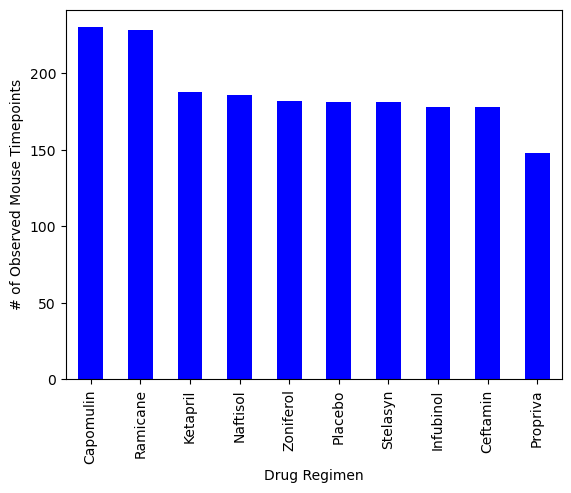

In [73]:
# Create a Pandas bar plot from the data above and then add lables and title
plot_pandas = mouse_counts.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

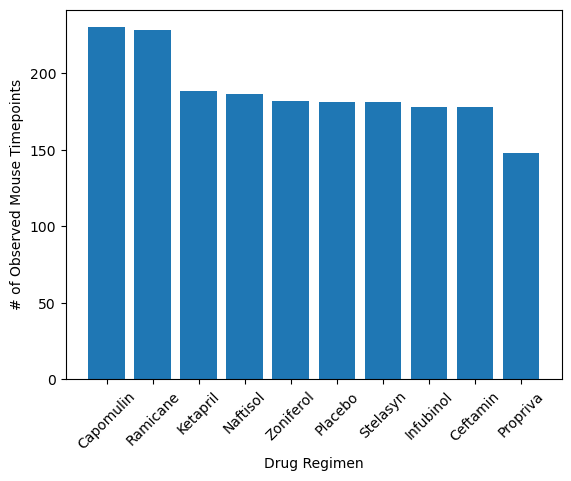

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
mouse_count = clean_combined_df["Drug Regimen"].value_counts()
drug_regimen = mouse_counts.index.values
plt.bar(drug_regimen, mouse_counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

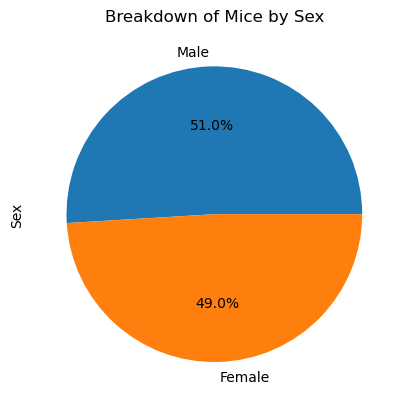

In [75]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
mouse_sex = clean_combined_df["Sex"].value_counts()
mouse_sex.plot(kind = "pie", title = "Breakdown of Mice by Sex",
                   ylabel="Sex", autopct="%1.1f%%")

plt.show()

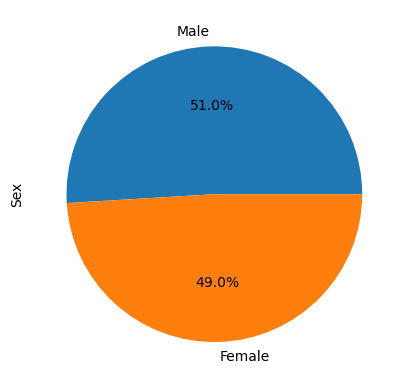

In [76]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
counts = clean_combined_df.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

### Quartiles, Find Outliers, and Create a Box Plots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timept_df = clean_combined_df.groupby("Mouse ID")["Timepoint"].max()
greatest_timept_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [78]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(clean_combined_df, greatest_timept_df, on=["Mouse ID", "Timepoint"])
tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [80]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
i = 0

In [81]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
i = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_mice = clean_combined_df.loc[clean_combined_df["Drug Regimen"]== treatment,:]
    
    # add subset 
    tumor_volume.append(treatment_mice["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quartile = tumor_volume[i].quantile([.25,.5,.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    IQR = upperq-lowerq
    lower_b = lowerq - (1.5*IQR)
    upper_b = lowerq + (1.5*IQR)
    i = i+1
    print(f"{treatment}'s potential outliers: Below {lower_b}) Above {upper_b}")

Capomulin's potential outliers: Below 26.714832162499995) Above 48.6570335675
Ramicane's potential outliers: Below 24.1865864625) Above 49.1626827075
Infubinol's potential outliers: Below 32.309217298749985) Above 62.31548930125001
Ceftamin's potential outliers: Below 32.81891142624998) Above 61.59794279875001


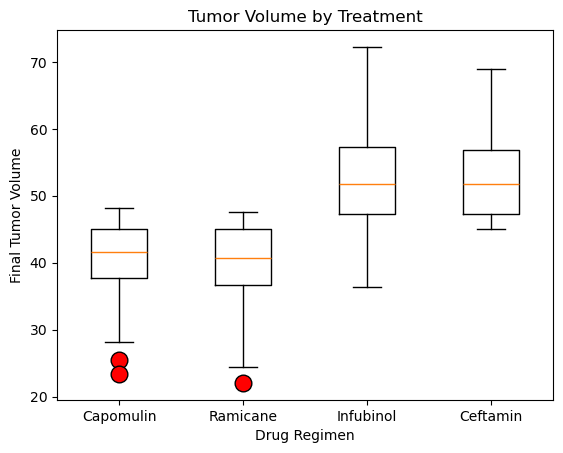

In [82]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
plt.boxplot(tumor_volume, labels=treatments, flierprops=dict(markerfacecolor='red', 
                                                             marker='o', markersize=12), vert=True)
plt.title("Tumor Volume by Treatment")
plt.ylabel("Final Tumor Volume")
plt.xlabel("Drug Regimen")
plt.show()

### Line and Scatter Plots

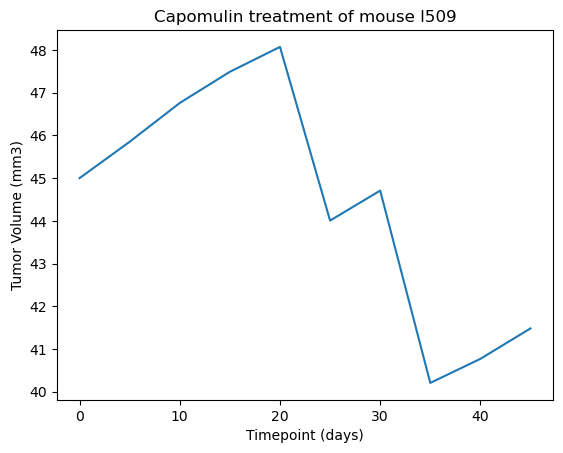

In [83]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_treatment = clean_combined_df.loc[clean_combined_df["Drug Regimen"]=="Capomulin"]
mouse_data = capomulin_treatment.loc[capomulin_treatment['Mouse ID']== "l509"]
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

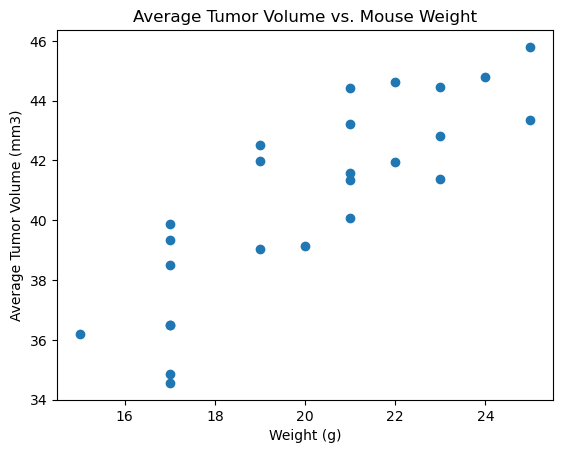

In [84]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_reg = capomulin_treatment.groupby(["Mouse ID"])
avg_mouse_wt = capomulin_reg["Weight (g)"].mean()
avg_tumor_vol = capomulin_reg["Tumor Volume (mm3)"].mean()

plt.scatter(avg_mouse_wt, avg_tumor_vol)
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

### Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


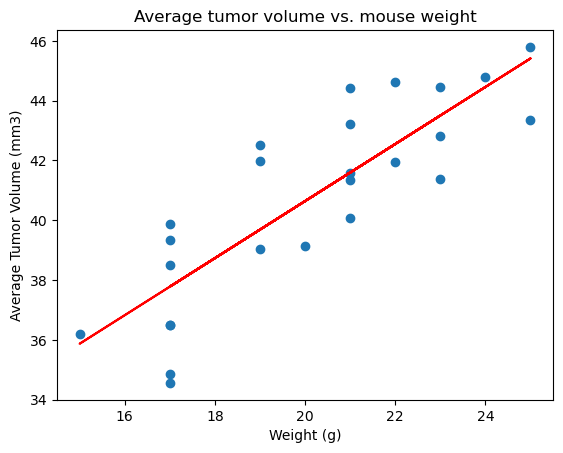

In [85]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_mouse_wt = capomulin_reg["Weight (g)"].mean()
avg_tumor_vol = capomulin_reg["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_mouse_wt, avg_tumor_vol)
rvalues = avg_mouse_wt * slope + intercept
linear_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_mouse_wt, avg_tumor_vol)
plt.plot(avg_mouse_wt, rvalues, color="red")
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

corr_coef = st.pearsonr(avg_mouse_wt, avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(corr_coef[0],2)}")